In [135]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from ycimpute.imputer import knnimput
import folium
from folium import plugins
import branca as cm
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [2]:
one = pd.read_csv('accidents_2005_to_2007.csv',low_memory=False)
two = pd.read_csv('accidents_2009_to_2011.csv',low_memory=False)
three = pd.read_csv('accidents_2012_to_2014.csv',low_memory=False)
df = pd.concat([one,two,three],axis=0)


In [3]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [5]:
df.drop(['Junction_Detail'],axis=1,inplace=True)

In [6]:
df.corr()

C:\Users\alpyk\AppData\Local\Temp\ipykernel_13724\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
Location_Easting_OSGR,1.000000,-0.420212,0.999359,-0.422123,-0.356474,0.013465,0.017152,-0.040780,-0.001883,-0.380452,-0.060289,-0.084678,-0.063709,0.044525,-0.000128,-0.095941,0.038404
Location_Northing_OSGR,-0.420212,1.000000,-0.430722,0.999974,0.167998,-0.031395,-0.041371,0.032093,0.003857,0.121262,0.035453,0.043899,0.047730,-0.030805,0.017006,0.053520,-0.013655
Longitude,0.999359,-0.430722,1.000000,-0.432531,-0.369755,0.013946,0.018442,-0.039501,-0.001894,-0.390536,-0.058800,-0.082418,-0.062824,0.045050,0.001401,-0.094278,0.038059
Latitude,-0.422123,0.999974,-0.432531,1.000000,0.165894,-0.031357,-0.041153,0.032251,0.003851,0.119492,0.035500,0.044789,0.047431,-0.030516,0.017623,0.053018,-0.013750
Police_Force,-0.356474,0.167998,-0.369755,0.165894,1.000000,-0.031712,-0.015491,0.007073,0.000428,0.981975,0.044895,-0.000199,0.197990,-0.119040,-0.018276,0.240858,-0.033599
Accident_Severity,0.013465,-0.031395,0.013946,-0.031357,-0.031712,1.000000,0.075976,-0.083544,0.002961,-0.031995,0.012754,-0.004072,-0.079108,0.064321,0.026128,-0.082169,-0.005907
Number_of_Vehicles,0.017152,-0.041371,0.018442,-0.041153,-0.015491,0.075976,1.000000,0.237349,-0.000116,-0.010506,-0.142306,-0.008871,0.084785,0.068607,0.024320,0.041081,-0.007846
Number_of_Casualties,-0.040780,0.032093,-0.039501,0.032251,0.007073,-0.083544,0.237349,1.000000,-0.001455,0.014316,-0.082984,0.007750,0.139551,-0.029212,0.001997,0.115974,-0.015140
Day_of_Week,-0.001883,0.003857,-0.001894,0.003851,0.000428,0.002961,-0.000116,-0.001455,1.000000,0.000325,0.006843,0.002344,-0.015944,0.007822,0.000385,-0.016571,-0.003669
Local_Authority_(District),-0.380452,0.121262,-0.390536,0.119492,0.981975,-0.031995,-0.010506,0.014316,0.000325,1.000000,0.055861,0.010440,0.204926,-0.119100,-0.016618,0.253824,-0.037073


C:\Users\alpyk\AppData\Local\Temp\ipykernel_13724\788681791.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap =sns.heatmap(df.corr(), vmin=-1, vmax=1,annot=True)


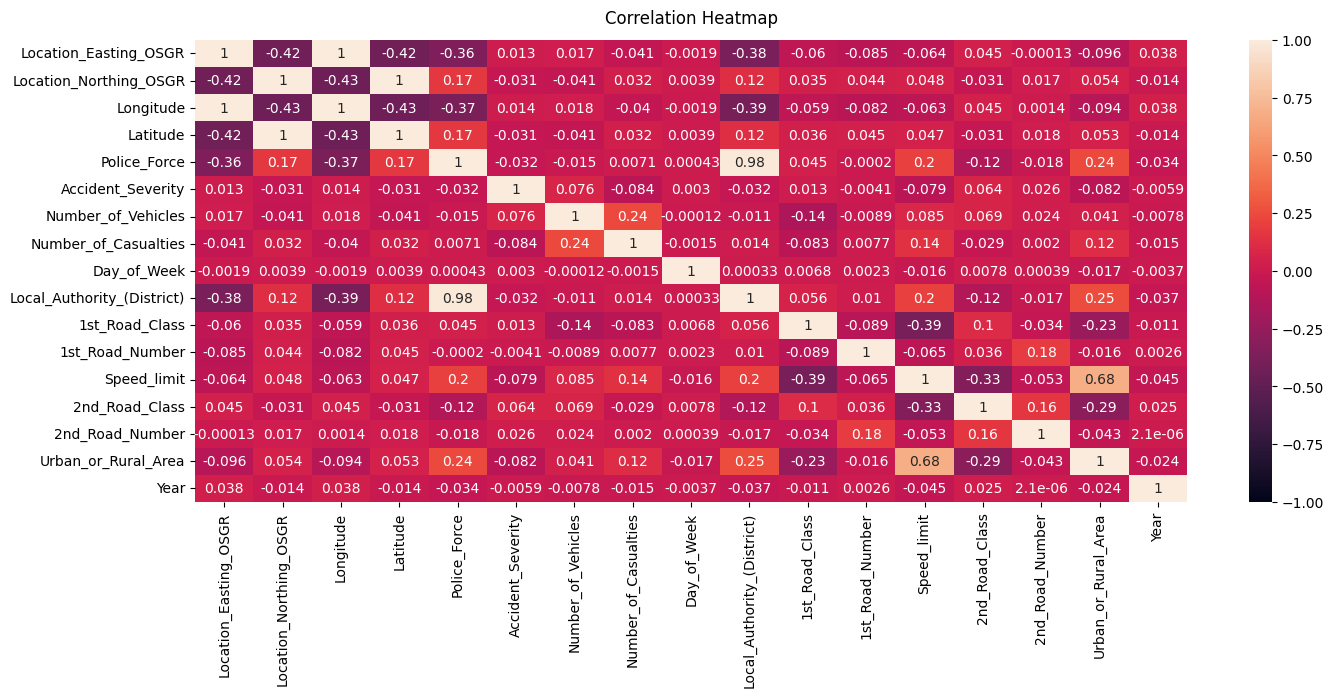

In [7]:
plt.figure(figsize=(16,6))
heatmap =sns.heatmap(df.corr(), vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


In [8]:
a = df[['Year','Accident_Index']].groupby('Year').count()

In [9]:
a = a.values.reshape(9,)

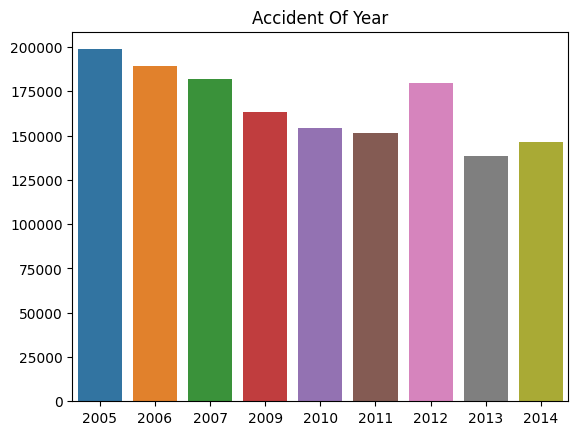

In [10]:
sns.barplot(x=df['Year'].unique(),y=a).set_title('Accident Of Year');

In [11]:
np.sort(df['Number_of_Casualties'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 35, 36, 38, 40,
       41, 42, 43, 45, 46, 48, 51, 54, 63, 68, 70, 87, 93], dtype=int64)

In [12]:
pd.cut(df['Number_of_Casualties'],10).unique()

[(0.908, 10.2], (19.4, 28.6], (10.2, 19.4], (28.6, 37.8], (37.8, 47.0], (65.4, 74.6], (47.0, 56.2], (83.8, 93.0], (56.2, 65.4]]
Categories (10, interval[float64, right]): [(0.908, 10.2] < (10.2, 19.4] < (19.4, 28.6] < (28.6, 37.8] ... (56.2, 65.4] < (65.4, 74.6] < (74.6, 83.8] < (83.8, 93.0]]

In [13]:
df['NOF'] = np.where(df['Number_of_Casualties']<=1,1,
                np.where(df['Number_of_Casualties']<3,2,
                    np.where(df['Number_of_Casualties']<5,3,
                            np.where(df['Number_of_Casualties']<7,4,
                                    np.where(df['Number_of_Casualties']<40,5,
                                            np.where(df['Number_of_Casualties']<50,6,
                                                    np.where(df['Number_of_Casualties']<60,7,
                                                            np.where(df['Number_of_Casualties']<70,8,
                                                                    np.where(df['Number_of_Casualties']<=95,9,9)))))))))

In [14]:
df[['Number_of_Casualties','NOF']].groupby('NOF').count()

,Number_of_Casualties
NOF,
1,1153856
2,241290
3,93903
4,12702
5,2378
6,12
7,3
8,2
9,4


In [15]:
df.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,NOF
464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014,1
464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014,2
464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014,1
464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014,2
464696,2.01E+12,314072.0,579971.0,-3.348426,55.106700,98,3,2,2,24/12/2014,...,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,2,Yes,NaN,2014,2


In [16]:
df[['Road_Surface_Conditions','Number_of_Casualties']].groupby('Road_Surface_Conditions').mean().sort_values(by='Number_of_Casualties')

,Number_of_Casualties
Road_Surface_Conditions,
Dry,1.331050
Frost/Ice,1.346633
Snow,1.356673
Wet/Damp,1.399830
Flood (Over 3cm of water),1.459169


In [17]:
df1 = df.drop(['Date','Time'],axis=1)

---------------------------------------------
   Accident_Severity      ratio
3            1280205  85.111525
2             204504  13.595984
1              19441   1.292491


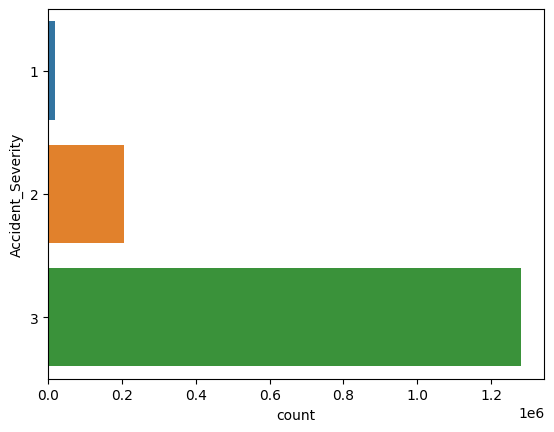

---------------------------------------------
   Day_of_Week      ratio
6       247137  16.430343
5       226411  15.052422
4       226359  15.048965
3       224110  14.899445
2       213748  14.210551
7       201413  13.390486
1       164972  10.967789


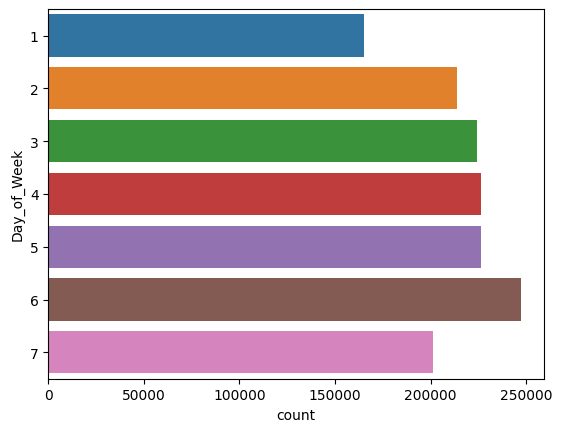

---------------------------------------------
   1st_Road_Class      ratio
3          684509  45.508028
6          431908  28.714423
4          191381  12.723532
5          134513   8.942792
1           57779   3.841306
2            4060   0.269920


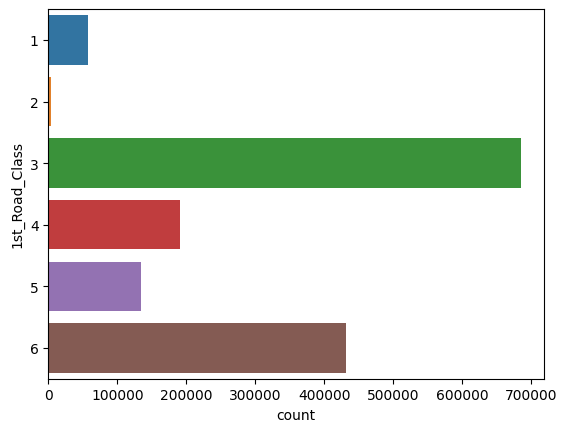

---------------------------------------------
                    Road_Type      ratio
Single carriageway    1126951  74.922780
Dual carriageway       221741  14.741947
Roundabout             100463   6.679055
One way street          30981   2.059701
Slip road               15668   1.041651
Unknown                  8346   0.554865


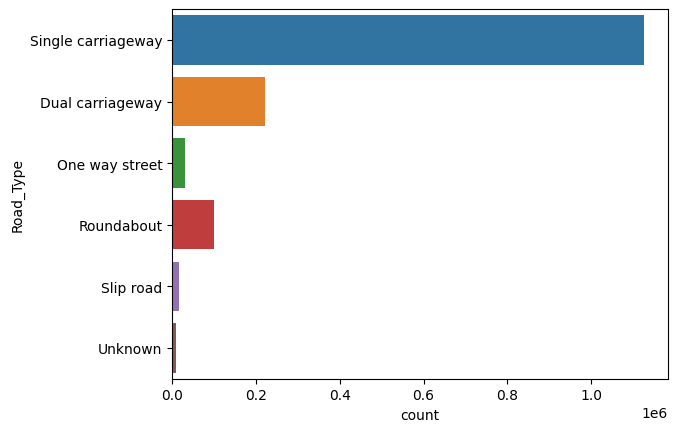

---------------------------------------------
    Speed_limit      ratio
30       968284  64.374165
60       238234  15.838447
40       122393   8.137021
70       109268   7.264435
50        48790   3.243692
20        17157   1.140644
10           14   0.000931
15           10   0.000665


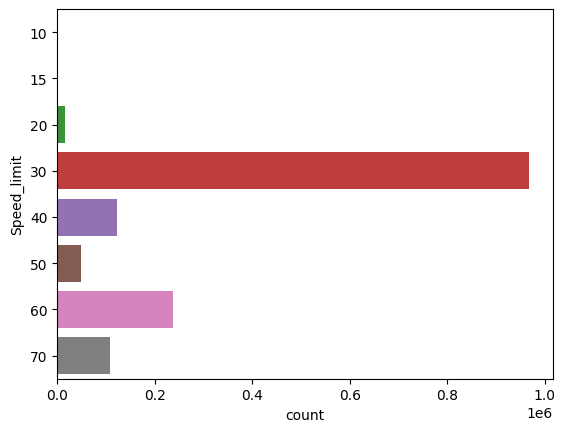

---------------------------------------------
                          Junction_Control      ratio
Giveway or uncontrolled             733940  48.794336
Automatic traffic signal            155717  10.352491
Stop Sign                             9179   0.610245
Authorised person                     2479   0.164811


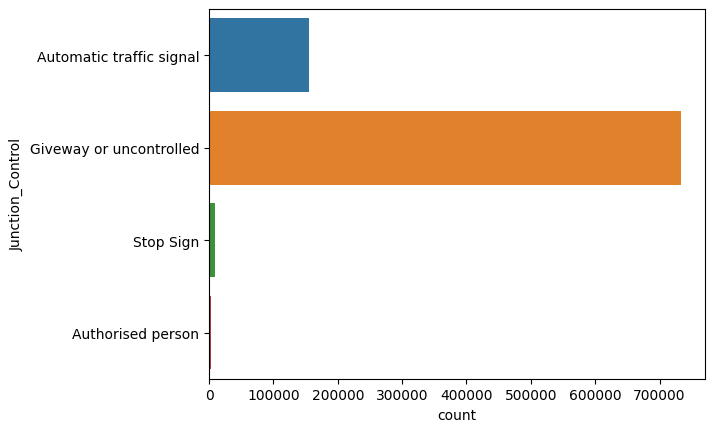

---------------------------------------------
    2nd_Road_Class      ratio
-1          615474  40.918392
 6          598326  39.778347
 3          149758   9.956321
 5           70366   4.678124
 4           58918   3.917030
 1           10146   0.674534
 2            1162   0.077253


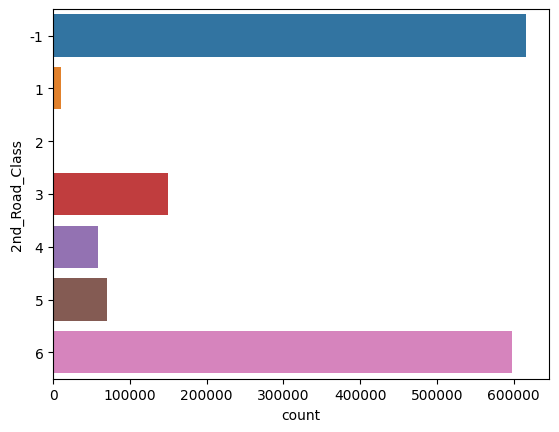

---------------------------------------------
                                    Pedestrian_Crossing-Human_Control  \
None within 50 metres                                         1495269   
Control by other authorised person                               5220   
Control by school crossing patrol                                3644   

                                        ratio  
None within 50 metres               99.409567  
Control by other authorised person   0.347040  
Control by school crossing patrol    0.242263  


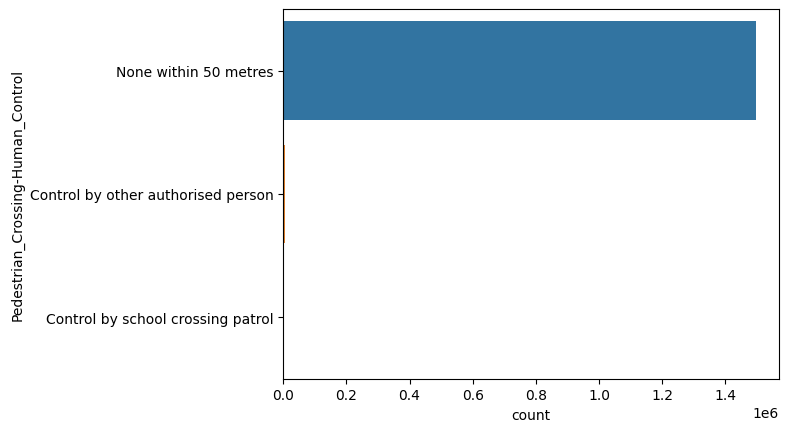

---------------------------------------------
                                             Pedestrian_Crossing-Physical_Facilities  \
No physical crossing within 50 meters                                        1252571   
Pedestrian phase at traffic signal junction                                   100248   
non-junction pedestrian crossing                                               79231   
Zebra crossing                                                                 40106   
Central refuge                                                                 27660   
Footbridge or subway                                                            4300   

                                                 ratio  
No physical crossing within 50 meters        83.274341  
Pedestrian phase at traffic signal junction   6.664761  
non-junction pedestrian crossing              5.267493  
Zebra crossing                                2.666356  
Central refuge                                1.8389

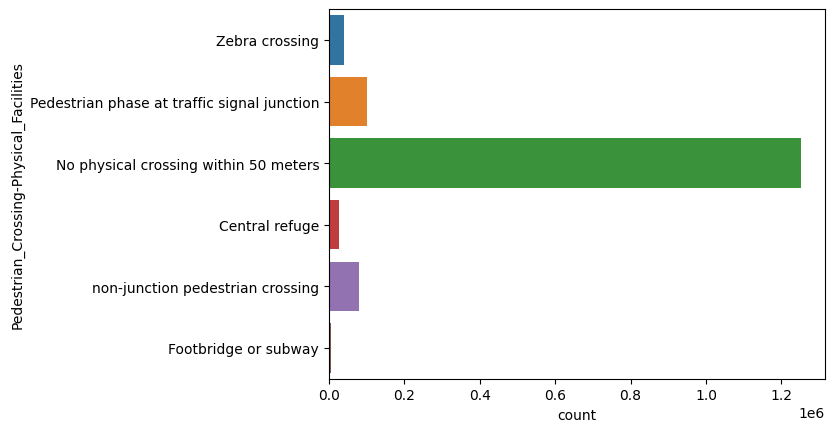

---------------------------------------------
                                           Light_Conditions      ratio
Daylight: Street light present                      1102222  73.278729
Darkness: Street lights present and lit              296340  19.701493
Darkeness: No street lighting                         82559   5.488748
Darkness: Street lighting unknown                     16120   1.071702
Darkness: Street lights present but unlit              6909   0.459329


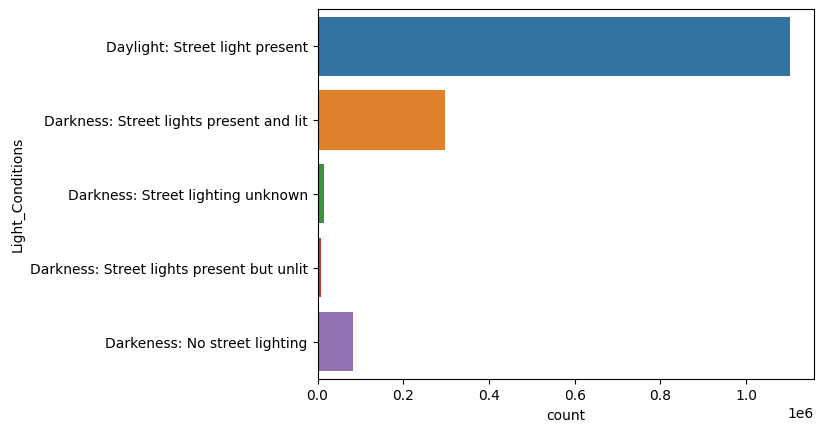

---------------------------------------------
                            Weather_Conditions      ratio
Fine without high winds                1203943  80.041419
Raining without high winds              177663  11.811521
Other                                    33503   2.227371
Unknown                                  28296   1.881195
Raining with high winds                  20813   1.383705
Fine with high winds                     18355   1.220291
Snowing without high winds               11301   0.751321
Fog or mist                               8190   0.544494
Snowing with high winds                   1960   0.130306


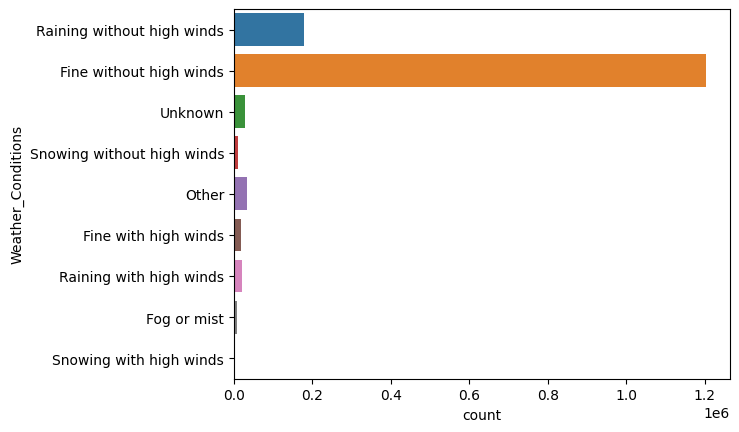

---------------------------------------------
                           Road_Surface_Conditions      ratio
Dry                                        1034670  68.787687
Wet/Damp                                    423477  28.153908
Frost/Ice                                    31405   2.087890
Snow                                         10497   0.697869
Flood (Over 3cm of water)                     2143   0.142472


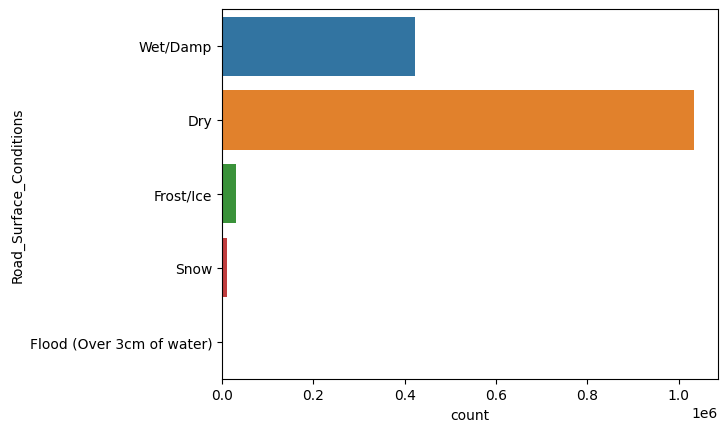

---------------------------------------------
                                                 Special_Conditions_at_Site  \
None                                                                1467553   
Roadworks                                                             17223   
Ol or diesel                                                           5243   
Mud                                                                    4610   
Road surface defective                                                 3664   
Auto traffic singal out                                                2788   
Permanent sign or marking defective or obscured                        2269   
Auto traffic signal partly defective                                    785   

                                                     ratio  
None                                             97.566931  
Roadworks                                         1.145032  
Ol or diesel                                      0.348569 

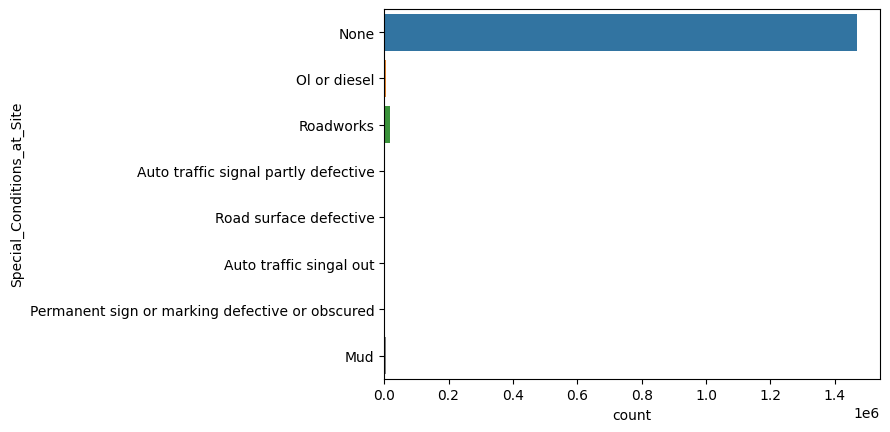

---------------------------------------------
                                         Carriageway_Hazards      ratio
None                                                 1476871  98.186418
Other object in carriageway                            11762   0.781970
Any animal (except a ridden horse)                      8014   0.532793
Pedestrian in carriageway (not injured)                 3586   0.238407
Involvement with previous accident                      2282   0.151714
Dislodged vehicle load in carriageway                   1606   0.106771


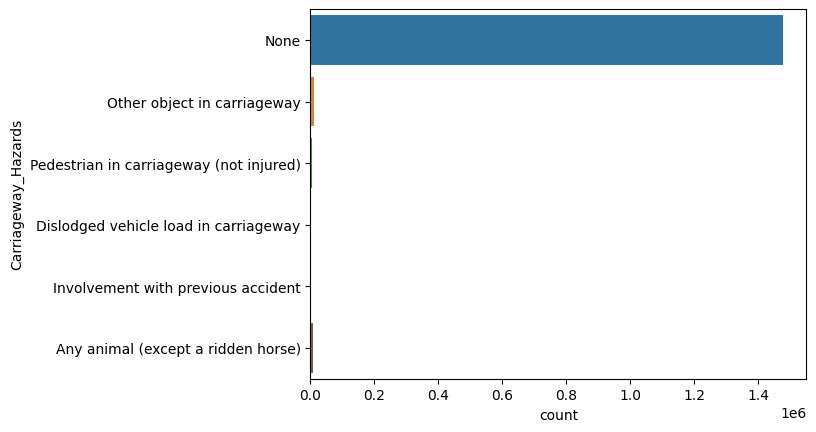

---------------------------------------------
   Urban_or_Rural_Area      ratio
1               972007  64.621680
2               532011  35.369544
3                  132   0.008776


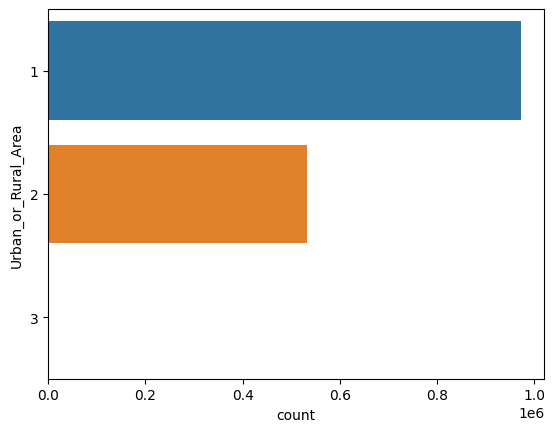

---------------------------------------------
     Did_Police_Officer_Attend_Scene_of_Accident      ratio
Yes                                      1218877  81.034272
No                                        282351  18.771466


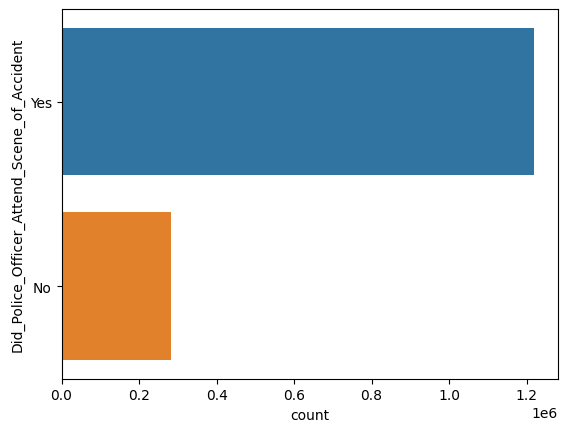

---------------------------------------------
        Year      ratio
2005  198735  13.212446
2006  189161  12.575940
2007  182115  12.107503
2012  179715  11.947944
2009  163554  10.873517
2010  154414  10.265864
2011  151474  10.070405
2014  146322   9.727886
2013  138660   9.218495


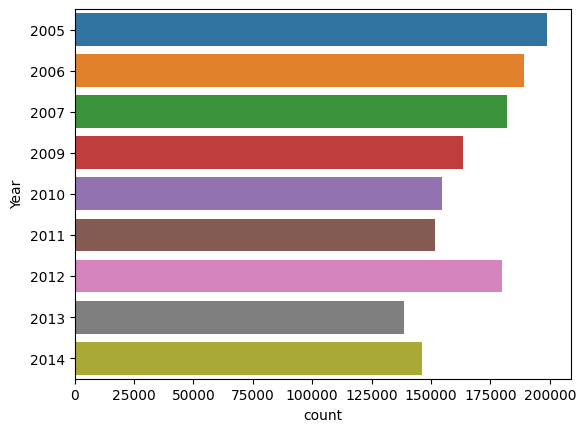

---------------------------------------------
       NOF      ratio
1  1153856  76.711498
2   241290  16.041618
3    93903   6.242928
4    12702   0.844464
5     2378   0.158096
6       12   0.000798
9        4   0.000266
7        3   0.000199
8        2   0.000133


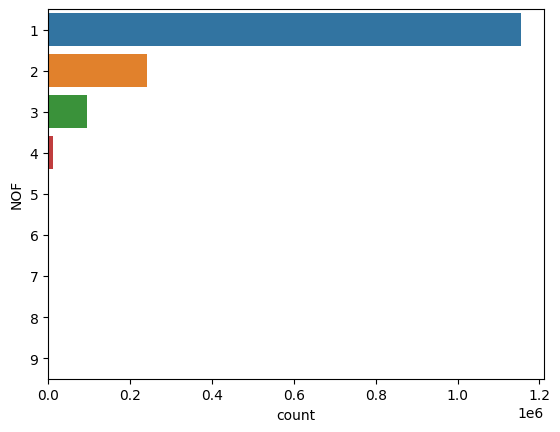

In [18]:
for i in df1.columns:
    if len(df[i].unique())<20:
        print('---------'*5)
        print(pd.DataFrame({i: df[i].value_counts(),'ratio':(100*df[i].value_counts())/len(df1)}))
        a=sns.countplot(y=i,data=df)
        plt.show()

# Trafik akışının değişmesi kazaları nasıl etkiler?Kaza oranlarını ne artırır?Zaman içinde kaza oranlarını tahmin edebilir miyiz?Kırsal ve kentsel alanlar nasıl farklılaştı?

In [19]:
print(df[['Urban_or_Rural_Area','Number_of_Casualties']].groupby('Urban_or_Rural_Area').mean().sort_values(by='Number_of_Casualties',ascending=True)
)
print(df[['Urban_or_Rural_Area','Speed_limit']].groupby('Urban_or_Rural_Area').mean().sort_values(by='Speed_limit',ascending=True))

                     Number_of_Casualties
Urban_or_Rural_Area                      
1                                1.280106
3                                1.348485
2                                1.480413
                     Speed_limit
Urban_or_Rural_Area             
1                      31.839462
3                      44.924242
2                      52.096404


In [20]:
df[['Year','Number_of_Casualties']].groupby('Year').mean().sort_values(by='Number_of_Casualties',ascending=True)
#Yıllara göre kayıp sayısına baktığımız zaman doğrusal bir artış veya azalış yok biraz daha derin bir inceleme yapılacak

,Number_of_Casualties
Year,
2013,1.324607
2014,1.329103
2012,1.346321
2011,1.346436
2010,1.351225
2009,1.358243
2007,1.360569
2005,1.363710
2006,1.366053


In [32]:
locationn=df[['Latitude','Longitude']]
locations = np.array(locationn)

In [33]:
df[['Latitude','Longitude']].isnull().sum()

Latitude     0
Longitude    0
dtype: int64

In [34]:
#Eksik Veri sayısı az olduğu için üstteki veriyle doldurmakta bir sakınca görmedim
df[['Latitude','Longitude']]=df[['Latitude','Longitude']].fillna(method='ffill')
df[['Location_Easting_OSGR','Location_Northing_OSGR']]=df[['Location_Easting_OSGR','Location_Northing_OSGR']].fillna(method='ffill')


In [35]:
m = folium.Map([51.489096,-0.191170]
               ,width='100',
              heigth='100')

for i in range(len(locations)):
    folium.CircleMarker(radius=1,
                       location=locations[i]).add_to(m)
m

KeyboardInterrupt: 

In [ ]:
"""heat_data = df.groupby(["Latitude","Longitude"])['Number_of_Casualties'].mean().reset_index().values.tolist()  
folium.plugins.HeatMap(heat_data,radius=1).add_to(m)
m
Sorunu anlayamadım"""

In [ ]:
df.isnull().sum()

In [ ]:
df.drop(['Junction_Control','LSOA_of_Accident_Location'],axis=1,inplace=True)

In [45]:
df['Road_Surface_Conditions']= df['Road_Surface_Conditions'].fillna(method='ffill')
df['Weather_Conditions']= df['Weather_Conditions'].fillna(method='ffill')
df['Carriageway_Hazards']= df['Carriageway_Hazards'].fillna(method='ffill')


In [ ]:
df0 = df.copy()

In [46]:
df.dropna(inplace=True)

In [42]:
df.drop(['Time','Date','Accident_Index','Location_Easting_OSGR','Location_Northing_OSGR'],axis=1,inplace=True)

In [63]:
lbe = LabelEncoder()
df0['N_Local_Authority_(Highway)']=lbe.fit_transform(df['Local_Authority_(Highway)'])
df0['N_Road_Type']=lbe.fit_transform(df['Road_Type'])
df0['N_Junction_Control']=lbe.fit_transform(df['Junction_Control'])
df0['N_Pedestrian_Crossing-Physical_Facilities']=lbe.fit_transform(df['Pedestrian_Crossing-Physical_Facilities'])
df0['N_Pedestrian_Crossing-Human_Control']=lbe.fit_transform(df['Pedestrian_Crossing-Human_Control'])
df0['N_Light_Conditions']=lbe.fit_transform(df['Light_Conditions'])
df0['N_Weather_Conditions']=lbe.fit_transform(df['Weather_Conditions'])
df0['N_Road_Surface_Conditions']=lbe.fit_transform(df['Road_Surface_Conditions'])
df0['N_Special_Conditions_at_Site']=lbe.fit_transform(df['Special_Conditions_at_Site'])
df0['N_Carriageway_Hazards']=lbe.fit_transform(df['Carriageway_Hazards'])
df0['N_LSOA_of_Accident_Location']=lbe.fit_transform(df['LSOA_of_Accident_Location'])
df0['N_Did_Police_Officer_Attend_Scene_of_Accident']=lbe.fit_transform(df['Did_Police_Officer_Attend_Scene_of_Accident'])


In [61]:
df0 = df.copy()

In [62]:
df0

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,NOF,N_Local_Authority_(Highway),N_Road_Type,N_Junction_Control,N_Pedestrian_Crossing-Physical_Facilities,N_Pedestrian_Crossing-Human_Control,N_Light_Conditions,N_Weather_Conditions,N_Road_Surface_Conditions,N_Special_Conditions_at_Site,N_Carriageway_Hazards,N_LSOA_of_Accident_Location,N_Did_Police_Officer_Attend_Scene_of_Accident
1,-0.211708,51.520075,1,3,1,1,4,12,E09000020,4,450,Dual carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005,1,111,0,1,3,2,2,1,0,3,3,2879,1
6,-0.211277,51.512695,1,3,2,1,5,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005,1,111,3,2,2,2,2,1,0,3,3,2845,1
8,-0.167342,51.483420,1,3,2,2,7,12,E09000020,3,3212,Single carriageway,30,Automatic traffic signal,4,304,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002900,2005,2,111,3,1,3,2,2,1,0,3,3,2870,1
9,-0.206531,51.512443,1,3,2,5,7,12,E09000020,4,450,Single carriageway,30,Giveway or uncontrolled,5,0,None within 50 metres,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005,4,111,3,2,0,2,4,1,0,3,3,2845,1
10,-0.182872,51.494902,1,3,1,1,1,12,E09000020,3,4,Single carriageway,30,Automatic traffic signal,4,325,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002835,2005,1,111,3,1,3,2,2,1,0,3,3,2805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455895,-3.146994,52.659999,63,2,1,2,6,753,W06000023,3,458,One way street,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,2,Yes,W01000501,2014,2,176,1,2,2,2,4,1,4,3,3,33712,1
455896,-3.706470,51.800237,63,3,2,1,7,753,W06000023,3,4067,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,2,Yes,W01000496,2014,1,176,3,2,2,2,2,1,0,3,3,33707,1
455897,-3.787192,51.776647,63,2,2,1,7,753,W06000023,3,4068,Roundabout,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,W01001899,2014,1,176,2,2,2,2,2,5,4,3,3,35092,1
455898,-3.376854,52.252424,63,3,2,1,3,753,W06000023,6,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,2,No,W01000455,2014,1,176,3,2,2,2,4,5,4,3,3,33666,0


In [69]:
datamean = df0[['Local_Authority_(Highway)','Road_Type','Junction_Control','Pedestrian_Crossing-Physical_Facilities',
               'Pedestrian_Crossing-Human_Control','Light_Conditions','Weather_Conditions','Road_Surface_Conditions',
               'Special_Conditions_at_Site','Carriageway_Hazards','LSOA_of_Accident_Location','Did_Police_Officer_Attend_Scene_of_Accident']]
df0.drop(['Local_Authority_(Highway)','Road_Type','Junction_Control','Pedestrian_Crossing-Physical_Facilities',
               'Pedestrian_Crossing-Human_Control','Light_Conditions','Weather_Conditions','Road_Surface_Conditions',
               'Special_Conditions_at_Site','Carriageway_Hazards','LSOA_of_Accident_Location','Did_Police_Officer_Attend_Scene_of_Accident'],axis=1,inplace=True)

In [74]:
va_list = list(df0)
#Veri normalizasyon yapmamız lazım veriler çok ayrık ve farklı duruyorlar
preprocessing.normalize(df0)

array([[-5.98147963e-05,  1.45561943e-02,  2.82534417e-04, ...,
         8.47603250e-04,  8.13416586e-01,  2.82534417e-04],
       [-6.06621703e-05,  1.47904025e-02,  2.87121505e-04, ...,
         8.61364516e-04,  8.16860682e-01,  2.87121505e-04],
       [-3.51366236e-05,  1.08099195e-02,  2.09968947e-04, ...,
         6.29906842e-04,  6.02610879e-01,  2.09968947e-04],
       ...,
       [-1.07004216e-04,  1.46290959e-03,  1.78001686e-03, ...,
         8.47627074e-05,  9.91497643e-01,  2.82542358e-05],
       [-1.00098924e-04,  1.54890067e-03,  1.86748738e-03, ...,
         8.89279704e-05,  9.97949684e-01,  0.00000000e+00],
       [-1.00988613e-04,  1.53808662e-03,  1.86542848e-03, ...,
         8.88299277e-05,  9.97856188e-01,  0.00000000e+00]])

In [75]:
df01 = pd.DataFrame(preprocessing.normalize(df0),columns=va_list)

In [78]:
df01['Accident_SS'] = df01['Accident_Severity']

In [80]:
df01.drop(['Accident_Severity'],axis=1,inplace=True)

In [99]:
df['Accident_Severity']

1         3
6         3
8         3
9         3
10        3
         ..
455895    2
455896    3
455897    2
455898    3
455906    3
Name: Accident_Severity, Length: 846477, dtype: int64

In [122]:
df01['Accident_'] = df['Accident_Severity']

In [ ]:
df01.drop(['Accident_SS'],axis=1,inplace=True)

,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year,NOF,N_Local_Authority_(Highway),N_Road_Type,N_Junction_Control,N_Pedestrian_Crossing-Physical_Facilities,N_Pedestrian_Crossing-Human_Control,N_Light_Conditions,N_Weather_Conditions,N_Road_Surface_Conditions,N_Special_Conditions_at_Site,N_Carriageway_Hazards,N_LSOA_of_Accident_Location,N_Did_Police_Officer_Attend_Scene_of_Accident
0,-0.000060,0.014556,0.000283,0.000283,0.000283,0.001130,0.003390,0.001130,0.127140,0.008476,0.001413,0.000000,0.000283,0.566482,0.000283,0.031361,0.000000,0.000283,0.000848,0.000565,0.000565,0.000283,0.000000,0.000848,0.000848,0.813417,0.000283
1,-0.000061,0.014790,0.000287,0.000574,0.000287,0.001436,0.003445,0.001436,0.000000,0.008614,0.001723,0.000000,0.000287,0.575679,0.000287,0.031870,0.000861,0.000574,0.000574,0.000574,0.000574,0.000287,0.000000,0.000861,0.000861,0.816861,0.000287
2,-0.000035,0.010810,0.000210,0.000420,0.000420,0.001470,0.002520,0.000630,0.674420,0.006299,0.000840,0.063831,0.000210,0.420988,0.000420,0.023307,0.000630,0.000210,0.000630,0.000420,0.000420,0.000210,0.000000,0.000630,0.000630,0.602611,0.000210
3,-0.000059,0.014668,0.000285,0.000570,0.001424,0.001993,0.003417,0.001139,0.128139,0.008543,0.001424,0.000000,0.000285,0.570932,0.001139,0.031608,0.000854,0.000570,0.000000,0.000570,0.001139,0.000285,0.000000,0.000854,0.000854,0.810125,0.000285
4,-0.000053,0.014859,0.000289,0.000289,0.000289,0.000289,0.003463,0.000866,0.001154,0.008657,0.001154,0.093781,0.000289,0.578558,0.000289,0.032030,0.000866,0.000289,0.000866,0.000577,0.000577,0.000289,0.000000,0.000866,0.000866,0.809403,0.000289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846472,-0.000093,0.001559,0.001865,0.000030,0.000059,0.000178,0.022289,0.000089,0.013557,0.000888,0.000178,0.000000,0.000059,0.059614,0.000059,0.005210,0.000030,0.000059,0.000059,0.000059,0.000118,0.000030,0.000118,0.000089,0.000089,0.997864,0.000030
846473,-0.000109,0.001523,0.001852,0.000059,0.000029,0.000206,0.022134,0.000088,0.119547,0.000882,0.000176,0.000000,0.000059,0.059200,0.000029,0.005173,0.000088,0.000059,0.000059,0.000059,0.000059,0.000029,0.000000,0.000088,0.000088,0.990798,0.000029
846474,-0.000107,0.001463,0.001780,0.000057,0.000028,0.000198,0.021275,0.000085,0.114938,0.000848,0.000170,0.000000,0.000028,0.056904,0.000028,0.004973,0.000057,0.000057,0.000057,0.000057,0.000057,0.000141,0.000113,0.000085,0.000085,0.991498,0.000028
846475,-0.000100,0.001549,0.001867,0.000059,0.000030,0.000089,0.022321,0.000178,0.000000,0.000889,0.000178,0.000000,0.000059,0.059700,0.000030,0.005217,0.000089,0.000059,0.000059,0.000059,0.000119,0.000148,0.000119,0.000089,0.000089,0.997950,0.000000


In [128]:
X= df01.iloc[:,0:27]
y= df01.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)
N = list(range(1,28))
acc_test = []
for i in N:    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    a = accuracy_score(y_pred,y_test)
    acc_test.append(a)
acc_test


In [133]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
a = accuracy_score(y_pred,y_test)
a

0.8584904545884132

In [134]:
a

0.8584904545884132

In [136]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
a = accuracy_score(y_pred,y_test)
a


C:\Users\alpyk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8722178905585484